# Importations

## Packages

In [1]:
import requests
import pandas as pd
import io

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Inégalités sociales face aux maladies chroniques (ER 1243)

In [ ]:
url_drees = "https://data.drees.solidarites-sante.gouv.fr/explore/dataset/er_inegalites_maladies_chroniques/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"

urlData = requests.get(url_drees).content
df_drees = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep = ";")
df_drees.head(5)

### Pour comprendre la structure de la table :

In [ ]:
list(set(df_drees['varPartition']))

In [ ]:
list(set(df_drees['varGroupage']))

### Pour tracer quelques barplots

In [ ]:
def selection_variable_barplot(var_groupage, var_partition, type_var_groupage = float, type_var_partition = float, groupby = 'valGroupage') :
    # On commence par ne sélectionner que les variables qu'on souhaite
    sous_df = df_drees[(df_drees['varGroupage'] == var_groupage)
                           &(df_drees['varPartition'] == var_partition)
                           ].copy()
    # On vérifie les types
    sous_df = sous_df.astype({'valPartition' : type_var_partition, 'valGroupage' : type_var_groupage},  errors='ignore')
    
    # On fait le groupby + l'opération voulue
    grouped_df = sous_df.groupby([groupby]).mean()
    grouped_df = grouped_df.sort_index()
    
    return grouped_df

### Exemples 

In [ ]:
# Le taux d'incidence moyen par dixième de niveau de vie

df_loc = selection_variable_barplot(var_groupage = 'FISC_NIVVIEM_E2015_S_moy_10',
                                    var_partition = 'FISC_REG_S',
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = 'valGroupage'
                                   )

sns.barplot(data=grouped_df, x= grouped_df.index, y="txStandDir")
plt.title('Titre du graphique...')
plt.xlabel('Class')
plt.ylabel('Mean Age')
# sns.despine()
plt.show()

In [5]:
rawData_incidence = rawData[(rawData['varGroupage'] == 'FISC_NIVVIEM_E2015_S_moy_10')
                           &(rawData['varPartition'] == 'FISC_REG_S')
                           ]
rawData_incidence

,type,varTaux,varTauxLib,I_cat,cat,catLib,varPartition,valPartition,varGroupage,valGroupage,varPoids,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,TOP_CVAOMI_IND,Artériopathie oblitérante du membre inférieur,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,13621.000499,1.374418e+06,0.009910,0.014240,0.013046,0.015435,0.014738,0.013555,0.015921
1,prevalence,TOP_CVCORON_CHR,Maladie coronaire chronique,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,30886.502030,1.374418e+06,0.022472,0.031912,0.030194,0.033631,0.033026,0.031317,0.034736
2,prevalence,TOP_CVVALVE_IND,Maladie valvulaire,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,6482.669891,1.374418e+06,0.004717,0.006956,0.006101,0.007810,0.007021,0.006193,0.007848
3,prevalence,TOP_IRMMHER_IND,Maladies métaboliques héréditaires ou amylose,0,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,2080.348333,1.374418e+06,0.001514,0.001515,0.001182,0.001847,0.001693,0.001332,0.002054
4,prevalence,TOP_NAUTRES_IND,Autres affections neurologiques,0,SUP_NEUDEG_CAT,Maladies neurologiques ou dégénératives,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,4457.531100,1.374418e+06,0.003243,0.003526,0.002986,0.004066,0.003521,0.003009,0.004032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45972,prevalence,TOP_PTRENFA_IND,Troubles psychiatriques ayant débuté dans l'en...,0,SUP_PSYPAT_CAT,Maladies psychiatriques,FISC_REG_S,75,FISC_NIVVIEM_E2015_S_moy_10,10,POIDS_FIDELI_S,1018.880834,9.325170e+05,0.001093,0.001587,0.001068,0.002106,0.001509,0.001016,0.002001
46172,prevalence,SUP_CV_CAT,Maladies cardioneurovasculaires,1,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,83399.961403,1.374418e+06,0.060680,0.085818,0.083292,0.088344,0.087454,0.084920,0.089988
46173,prevalence,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,1,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,21016.687362,1.374418e+06,0.015291,0.017164,0.015987,0.018340,0.017821,0.016652,0.018991
46174,prevalence,SUP_PSYPAT_CAT,Maladies psychiatriques,1,SUP_PSYPAT_CAT,Maladies psychiatriques,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,89880.210265,1.374418e+06,0.065395,0.074454,0.072089,0.076819,0.074301,0.072029,0.076572


In [6]:
rawData_incidence = rawData_incidence.astype({'valPartition' : float, 'valGroupage' : int},  errors='ignore')

In [7]:
grouped_df = rawData_incidence.groupby(['valGroupage']).mean()
grouped_df = grouped_df.sort_index()
grouped_df

,I_cat,valPartition,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
valGroupage,,,,,,,,,,,
1,0.211538,41.352941,7733.668727,776130.544229,0.009891,0.012316,0.011052,0.013579,0.012644,0.011395,0.013892
2,0.211538,41.352941,9211.359270,745003.095540,0.011656,0.012692,0.011389,0.013995,0.012746,0.011462,0.014030
3,0.211538,41.352941,9910.046387,741146.072507,0.012376,0.012495,0.011184,0.013806,0.012465,0.011163,0.013767
4,0.211538,41.352941,9646.126323,744043.869106,0.011869,0.011959,0.010602,0.013315,0.012037,0.010686,0.013388
5,0.211538,41.352941,9224.140473,750963.638177,0.011424,0.011582,0.010222,0.012943,0.011707,0.010351,0.013064
6,0.211538,41.352941,8898.453792,754545.468109,0.011081,0.011323,0.009956,0.012690,0.011436,0.010064,0.012809
7,0.211538,41.352941,8587.725216,757391.533269,0.010765,0.011018,0.009668,0.012368,0.011119,0.009768,0.012470
8,0.211538,41.352941,8645.153658,756574.262605,0.010934,0.010465,0.009184,0.011746,0.010564,0.009286,0.011841
9,0.211538,41.352941,8961.936985,753345.746352,0.011583,0.010093,0.008855,0.011330,0.010196,0.008974,0.011417


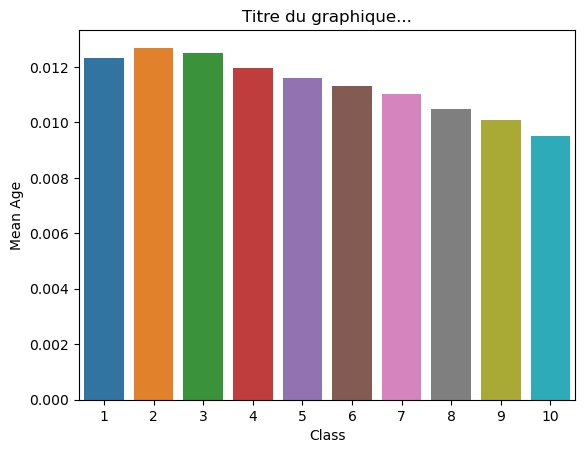

In [8]:


sns.barplot(data=grouped_df, x= grouped_df.index, y="txStandDir")
plt.title('Titre du graphique...')
plt.xlabel('Class')
plt.ylabel('Mean Age')
# sns.despine()
plt.show()

In [9]:
rawData_incidence = rawData[(rawData['varPartition'].isin(['FISC_NIVVIEM_E2015_S_moy_10', 'SEXE']))
                           &(rawData['varGroupage'] == 'FISC_REG_S')
                           ]
rawData_incidence

,type,varTaux,varTauxLib,I_cat,cat,catLib,varPartition,valPartition,varGroupage,valGroupage,varPoids,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH


#### Dictionnaire code régions

In [3]:
dico_regions = {
    '1' : 'Guadeloupe',
    '2' : 'Martinique',
    '3' : 'Guyane',
    '4' : 'La Réunion',
    '6' : 'Mayotte',
    '11' : 'Ile de France',
    '24' : 'Centre val de Loire',
    '27' : 'Bourgogne Franche-Comté',
    '28' : 'Normandie' ,
    '32' : 'Nord pas de Calais Picardie',
    '44' : 'Alsace Champagne Ardenne Lorraine',
    '52' : 'Pays de la Loire',
    '53' : 'bretagne' ,
    '75' : 'Aquitaine Limousin Poitou-Charentes',
    '76' : 'Langeudoc-Roussillon Midi-Pyrénées' ,
    '84' : 'Auvergne Rhône-Alpes' ,
    '93' : 'Procence Alpes Côte d\'Azur' ,
    '94' : 'Corse'
}

In [4]:
set(rawData['valGroupage'])

{'1',
 '10',
 '2',
 '3',
 '30-39',
 '4',
 '40-49',
 '5',
 '50-59',
 '6',
 '60-69',
 '7',
 '70-79',
 '8',
 '80-89',
 '9',
 '<30',
 '>=90',
 'F',
 'M',
 nan}

In [ ]:
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
sns.boxplot(data=df, x='team', y='rebounds', ax=axes[1,0])
sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])